In [2]:
import pandas as pd
import sys
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [3]:
df = pd.read_csv('Housing.csv')

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.shape


(545, 13)

In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [9]:
df.notnull().sum()

price               545
area                545
bedrooms            545
bathrooms           545
stories             545
mainroad            545
guestroom           545
basement            545
hotwaterheating     545
airconditioning     545
parking             545
prefarea            545
furnishingstatus    545
dtype: int64

In [10]:
# Dane wejściowe
df.columns = df.columns.str.lower()  # standaryzacja nazw kolumn
X = df.drop("price", axis=1)
y = df["price"]

In [11]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
onehot_cols = ['furnishingstatus']
numeric_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [12]:
# Przekształcenie zmiennych binarnych do 0/1
X[binary_cols] = X[binary_cols].apply(lambda col: col.map({'yes': 1, 'no': 0}))

In [13]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('onehot', OneHotEncoder(drop='first'), onehot_cols)
], remainder='passthrough')  # binarne już zakodowane, zostają bez zmian


In [14]:
# Pipeline modelu
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [15]:
# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Sprawdzenie jak wyglądają dane X po transformacji binarnych kolumn
print("Dane X po transformacji binarnych kolumn:")
print(X.head())
print(f"\nKształt danych X: {X.shape}")

Dane X po transformacji binarnych kolumn:
   area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0  7420         4          2        3         1          0         0   
1  8960         4          4        4         1          0         0   
2  9960         3          2        2         1          0         1   
3  7500         4          2        2         1          0         1   
4  7420         4          1        2         1          1         1   

   hotwaterheating  airconditioning  parking  prefarea furnishingstatus  
0                0                1        2         1        furnished  
1                0                1        3         0        furnished  
2                0                0        2         1   semi-furnished  
3                0                1        3         1        furnished  
4                0                1        2         0        furnished  

Kształt danych X: (545, 12)


In [17]:
# Sprawdzenie czy kolumny binarne zostały prawidłowo zakodowane
print("Unikalne wartości w kolumnach binarnych po transformacji:")
for col in binary_cols:
    print(f"{col}: {X[col].unique()}")

Unikalne wartości w kolumnach binarnych po transformacji:
mainroad: [1 0]
guestroom: [0 1]
basement: [0 1]
hotwaterheating: [0 1]
airconditioning: [1 0]
prefarea: [1 0]


In [18]:
# Wyświetlenie informacji o zbiorach treningowych i testowych
print("Informacje o zbiorach danych:")
print(f"Rozmiar zbioru treningowego X: {X_train.shape}")
print(f"Rozmiar zbioru testowego X: {X_test.shape}")
print(f"Rozmiar zbioru treningowego y: {y_train.shape}")
print(f"Rozmiar zbioru testowego y: {y_test.shape}")

print(f"\nPierwsze 5 wierszy X_train:")
print(X_train.head())

print(f"\nPierwsze 5 wartości y_train:")
print(y_train.head())

Informacje o zbiorach danych:
Rozmiar zbioru treningowego X: (436, 12)
Rozmiar zbioru testowego X: (109, 12)
Rozmiar zbioru treningowego y: (436,)
Rozmiar zbioru testowego y: (109,)

Pierwsze 5 wierszy X_train:
     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
46   6000         3          2        4         1          0         0   
93   7200         3          2        1         1          0         1   
335  3816         2          1        1         1          0         1   
412  2610         3          1        2         1          0         1   
471  3750         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea furnishingstatus  
46                 0                1        1         0        furnished  
93                 0                1        3         0   semi-furnished  
335                0                1        2         0        furnished  
412                0                0   

In [19]:
# Sprawdzenie typów danych po transformacji
print("Typy danych po transformacji:")
print(X.dtypes)

print(f"\nStatystyki opisowe dla danych numerycznych:")
print(X[numeric_cols].describe())

print(f"\nStatystyki opisowe dla danych binarnych:")
print(X[binary_cols].describe())

Typy danych po transformacji:
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad             int64
guestroom            int64
basement             int64
hotwaterheating      int64
airconditioning      int64
parking              int64
prefarea             int64
furnishingstatus    object
dtype: object

Statystyki opisowe dla danych numerycznych:
               area    bedrooms   bathrooms     stories     parking
count    545.000000  545.000000  545.000000  545.000000  545.000000
mean    5150.541284    2.965138    1.286239    1.805505    0.693578
std     2170.141023    0.738064    0.502470    0.867492    0.861586
min     1650.000000    1.000000    1.000000    1.000000    0.000000
25%     3600.000000    2.000000    1.000000    1.000000    0.000000
50%     4600.000000    3.000000    1.000000    2.000000    0.000000
75%     6360.000000    3.000000    2.000000    2.000000    1.000000
max    16200.000000    6.000000    4.000000

In [20]:
# Trenowanie
model.fit(X_train, y_train)

/Users/franciszeklasinski/Library/Python/3.9/lib/python/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['area', 'bedrooms',
                                                   'bathrooms', 'stories',
                                                   'parking']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['furnishingstatus'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [21]:
# Predykcja i metryki
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


In [22]:
rmse, r2

(np.float64(1401898.6592378002), 0.6111796344727524)

In [23]:
# Import bibliotek do wizualizacji
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)

In [24]:
# Szczegółowa analiza wyników modelu
print("="*50)
print("WYNIKI MODELU RANDOM FOREST")
print("="*50)
print(f"Root Mean Squared Error (RMSE): {rmse:,.0f}")
print(f"R² Score: {r2:.4f}")
print(f"Średnia cena w zbiorze testowym: {y_test.mean():,.0f}")
print(f"Odchylenie standardowe cen: {y_test.std():,.0f}")
print(f"RMSE jako % średniej ceny: {(rmse/y_test.mean())*100:.2f}%")

# Analiza błędów
errors = y_test - y_pred
print(f"\nANALIZA BŁĘDÓW:")
print(f"Średni błąd: {errors.mean():,.0f}")
print(f"Mediana błędu: {np.median(errors):,.0f}")
print(f"Odchylenie standardowe błędów: {errors.std():,.0f}")
print(f"Maksymalny błąd: {errors.max():,.0f}")
print(f"Minimalny błąd: {errors.min():,.0f}")

WYNIKI MODELU RANDOM FOREST
Root Mean Squared Error (RMSE): 1,401,899
R² Score: 0.6112
Średnia cena w zbiorze testowym: 5,007,537
Odchylenie standardowe cen: 2,258,622
RMSE jako % średniej ceny: 28.00%

ANALIZA BŁĘDÓW:
Średni błąd: 211,564
Mediana błędu: -8,960
Odchylenie standardowe błędów: 1,392,244
Maksymalny błąd: 5,744,445
Minimalny błąd: -3,080,350


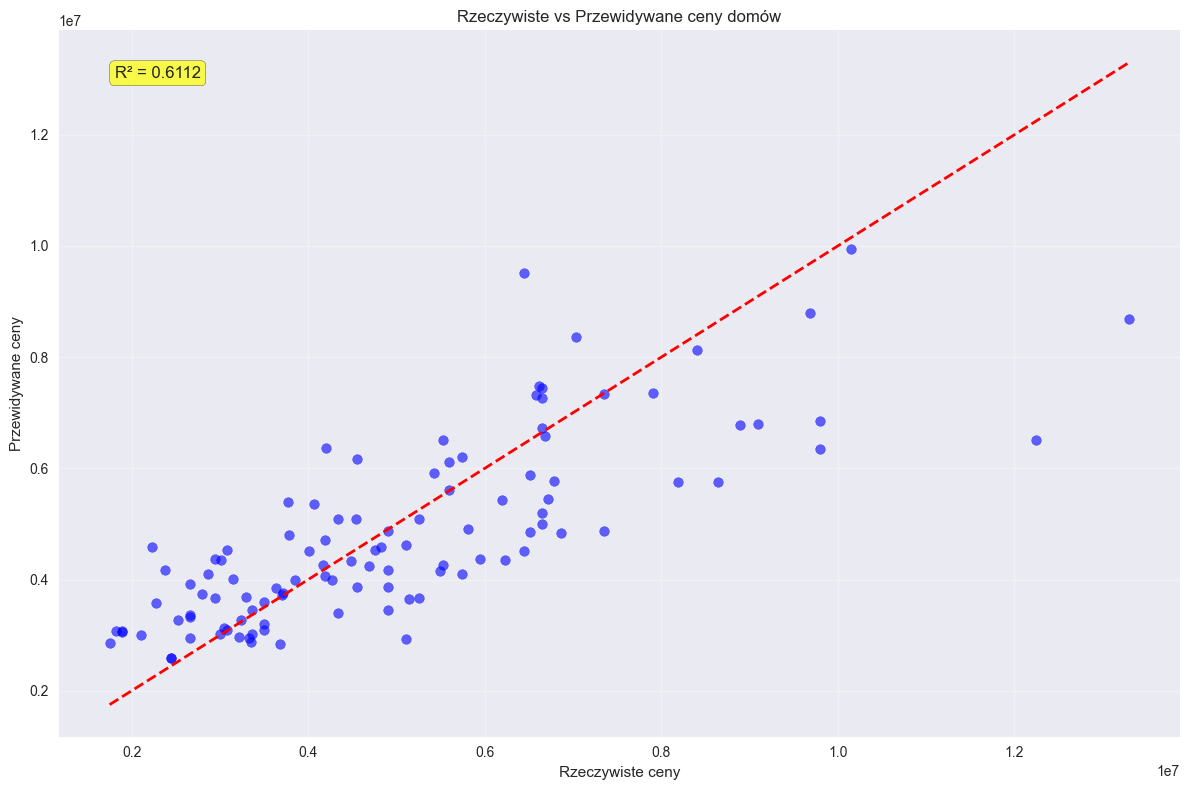

In [25]:
# Wykres: Rzeczywiste vs Przewidywane ceny
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Rzeczywiste ceny')
plt.ylabel('Przewidywane ceny')
plt.title('Rzeczywiste vs Przewidywane ceny domów')
plt.grid(True, alpha=0.3)

# Dodanie informacji o R²
plt.text(0.05, 0.95, f'R² = {r2:.4f}', transform=plt.gca().transAxes, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7),
         fontsize=12, verticalalignment='top')

plt.tight_layout()
plt.show()

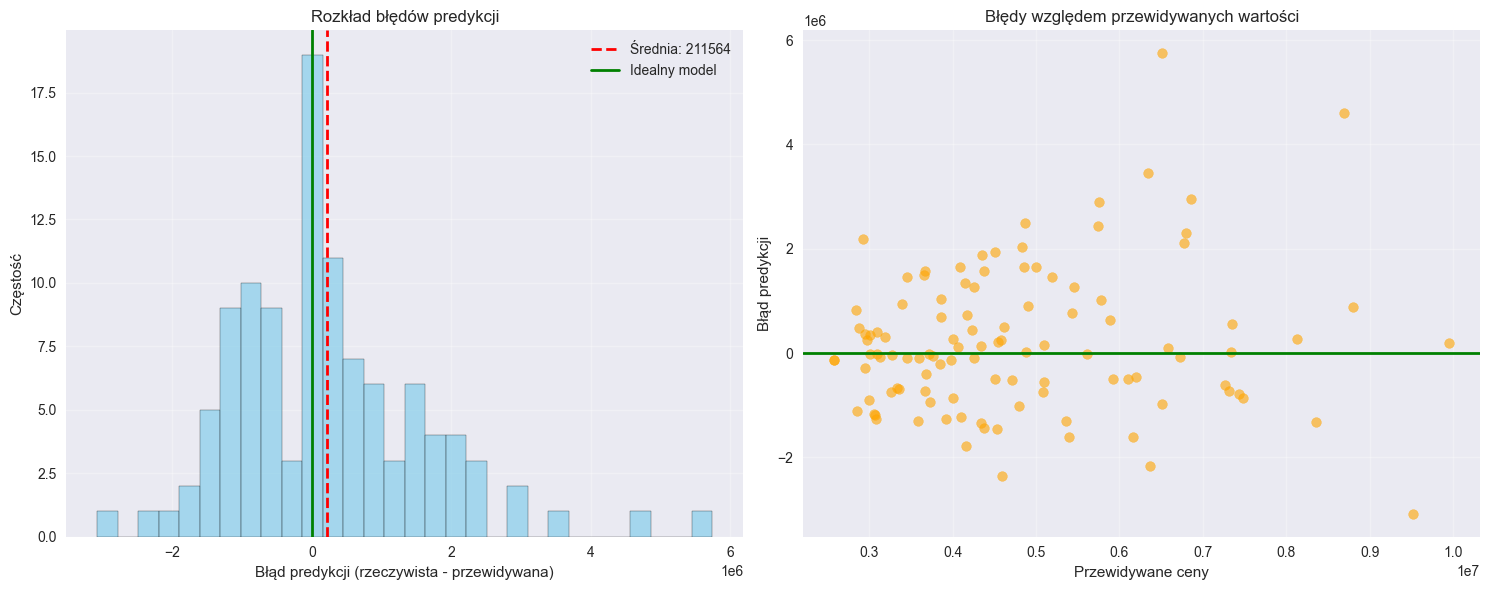

In [26]:
# Wykres rozkładu błędów
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Histogram błędów
ax1.hist(errors, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
ax1.axvline(errors.mean(), color='red', linestyle='--', linewidth=2, label=f'Średnia: {errors.mean():.0f}')
ax1.axvline(0, color='green', linestyle='-', linewidth=2, label='Idealny model')
ax1.set_xlabel('Błąd predykcji (rzeczywista - przewidywana)')
ax1.set_ylabel('Częstość')
ax1.set_title('Rozkład błędów predykcji')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Wykres błędów względem przewidywanych wartości
ax2.scatter(y_pred, errors, alpha=0.6, color='orange')
ax2.axhline(y=0, color='green', linestyle='-', linewidth=2)
ax2.set_xlabel('Przewidywane ceny')
ax2.set_ylabel('Błąd predykcji')
ax2.set_title('Błędy względem przewidywanych wartości')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

WAŻNOŚĆ CECH W MODELU:
area                     : 0.4679
bathrooms                : 0.1515
furnishingstatus_semi-furnished: 0.0627
parking                  : 0.0578
stories                  : 0.0569
bedrooms                 : 0.0485
guestroom                : 0.0350
airconditioning          : 0.0309
furnishingstatus_unfurnished: 0.0305
prefarea                 : 0.0173
hotwaterheating          : 0.0168
mainroad                 : 0.0139
basement                 : 0.0102


/var/folders/rc/ls7fy_xn7bj_z46fzrtflfvw0000gn/T/ipykernel_14710/568443533.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(10), x='importance', y='feature', palette='viridis')


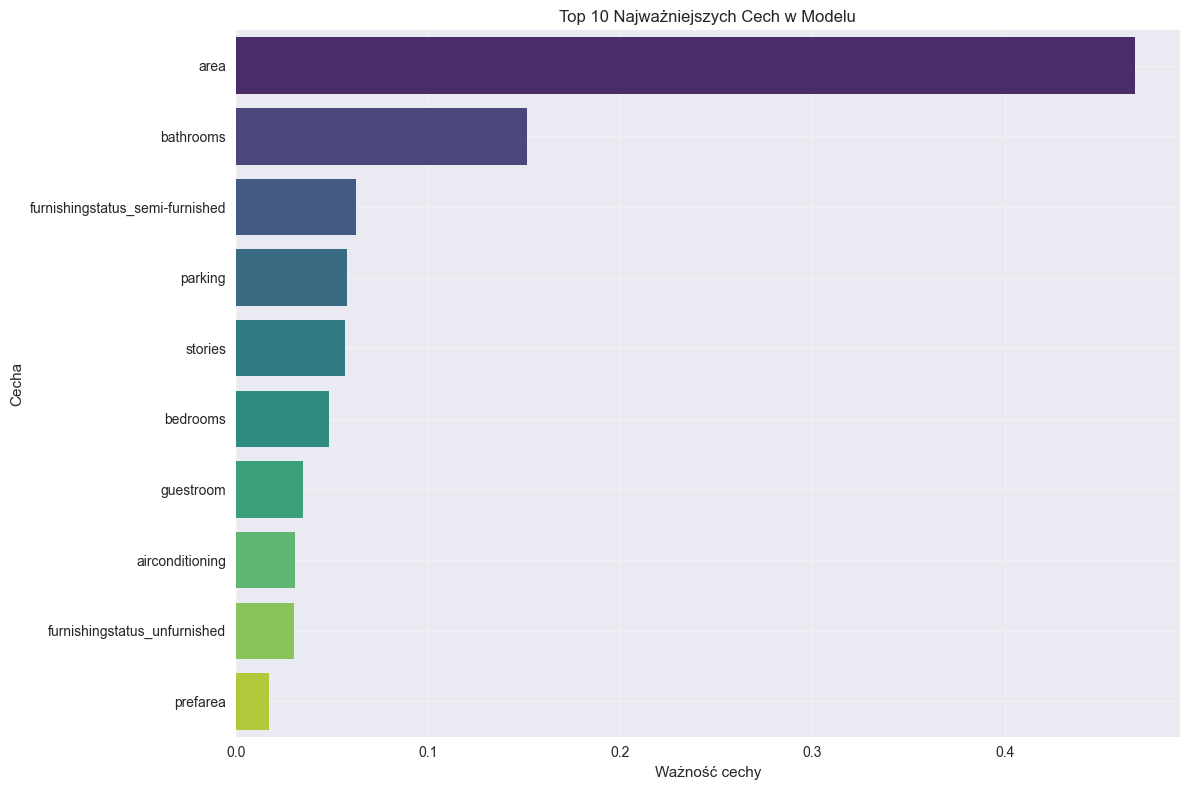

In [27]:
# Analiza ważności cech (Feature Importance)
feature_importance = model.named_steps['regressor'].feature_importances_

# Pobieranie nazw cech po przetworzeniu
feature_names = numeric_cols + binary_cols + ['furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']

# Tworzenie DataFrame z ważnościami
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("WAŻNOŚĆ CECH W MODELU:")
print("="*40)
for i, row in importance_df.iterrows():
    print(f"{row['feature']:<25}: {row['importance']:.4f}")

# Wykres ważności cech
plt.figure(figsize=(12, 8))
sns.barplot(data=importance_df.head(10), x='importance', y='feature', palette='viridis')
plt.title('Top 10 Najważniejszych Cech w Modelu')
plt.xlabel('Ważność cechy')
plt.ylabel('Cecha')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

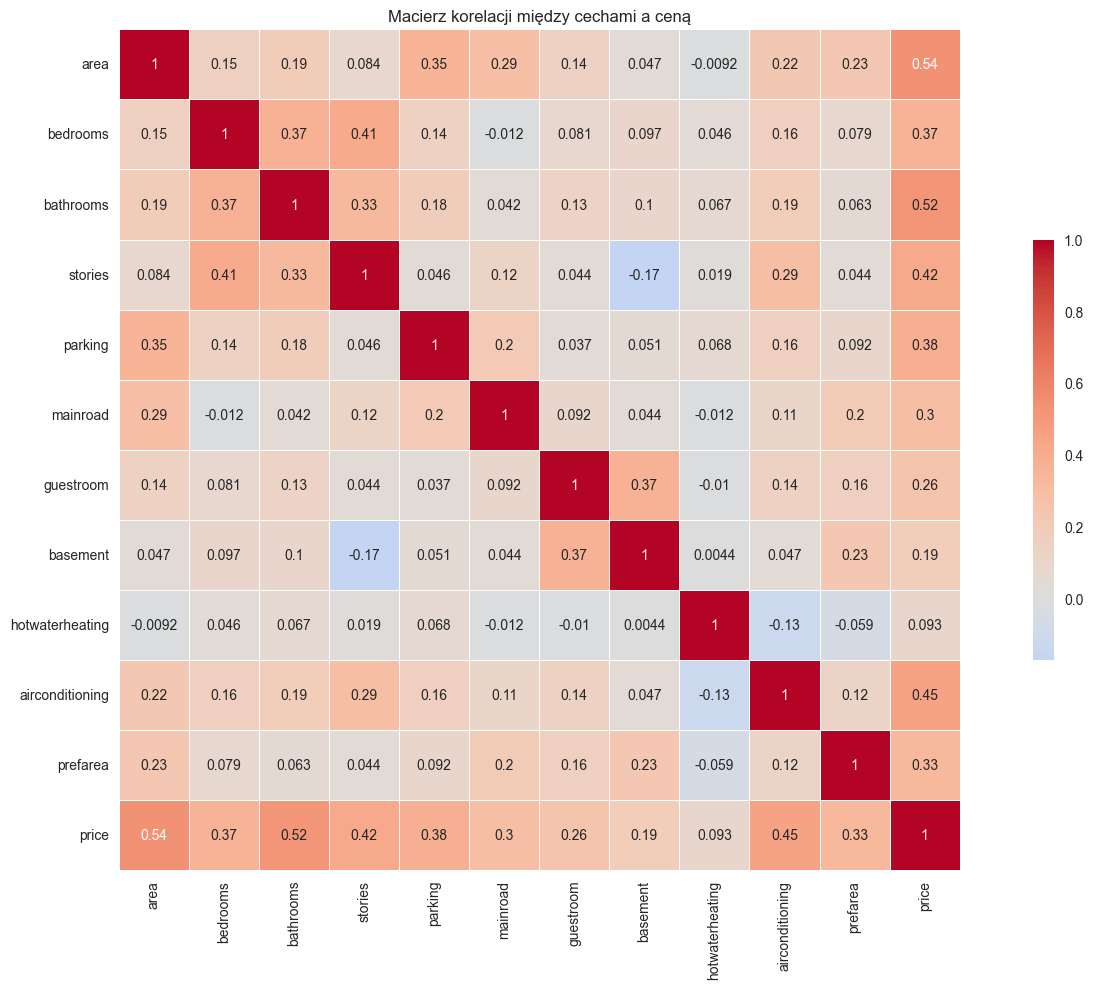


KORELACJA CECH Z CENĄ:
area                     : 0.5360
bathrooms                : 0.5175
airconditioning          : 0.4530
stories                  : 0.4207
parking                  : 0.3844
bedrooms                 : 0.3665
prefarea                 : 0.3298
mainroad                 : 0.2969
guestroom                : 0.2555
basement                 : 0.1871
hotwaterheating          : 0.0931


In [28]:
# Analiza korelacji między cechami a ceną
plt.figure(figsize=(15, 10))

# Tworzenie macierzy korelacji tylko dla kolumn numerycznych i binarnych
correlation_data = X[numeric_cols + binary_cols].copy()
correlation_data['price'] = y
correlation_matrix = correlation_data.corr()

# Heatmapa korelacji
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .5})
plt.title('Macierz korelacji między cechami a ceną')
plt.tight_layout()
plt.show()

# Korelacja z ceną w porządku malejącym
price_correlation = correlation_matrix['price'].sort_values(ascending=False)
print("\nKORELACJA CECH Z CENĄ:")
print("="*30)
for feature, corr in price_correlation.items():
    if feature != 'price':
        print(f"{feature:<25}: {corr:.4f}")

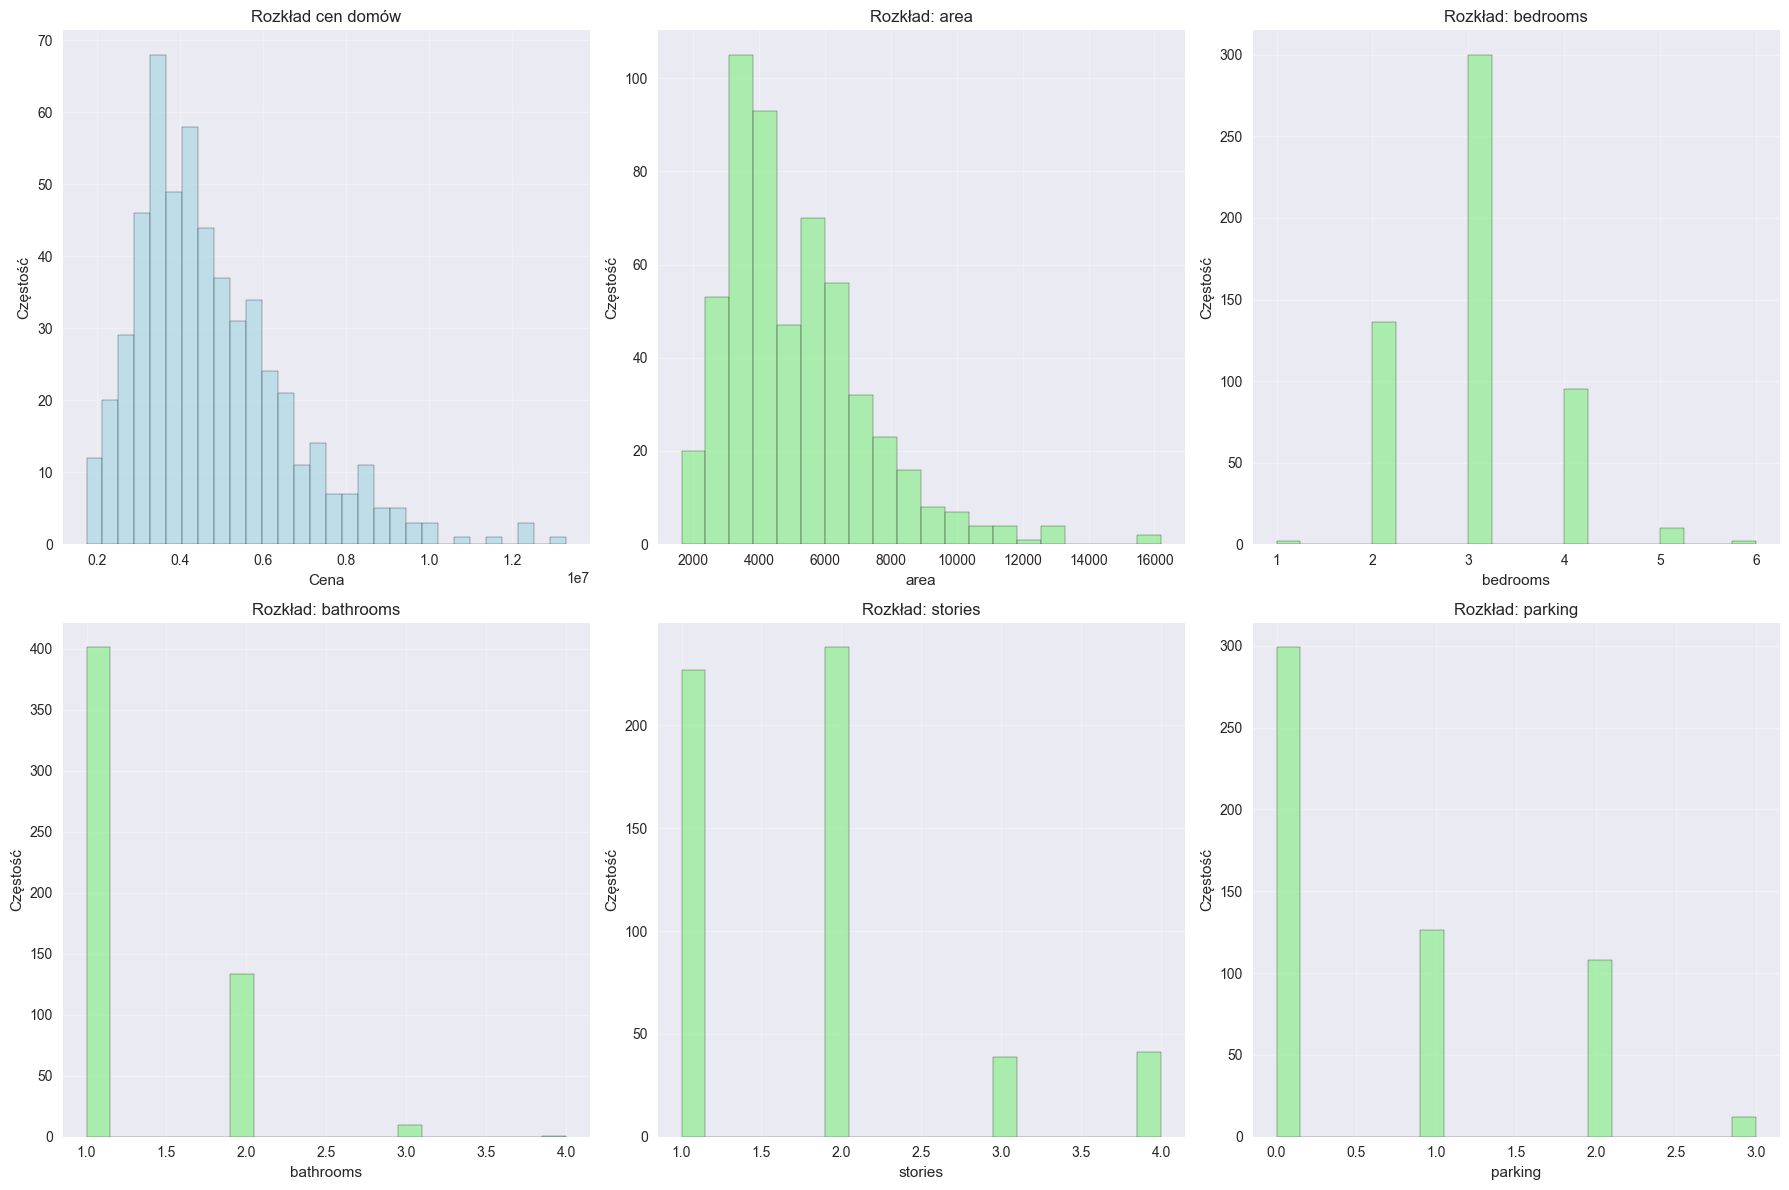

In [29]:
# Analiza rozkładu cen i głównych cech numerycznych
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Rozkład cen
axes[0].hist(y, bins=30, alpha=0.7, color='lightblue', edgecolor='black')
axes[0].set_title('Rozkład cen domów')
axes[0].set_xlabel('Cena')
axes[0].set_ylabel('Częstość')
axes[0].grid(True, alpha=0.3)

# Rozkłady głównych cech numerycznych
for i, col in enumerate(numeric_cols):
    axes[i+1].hist(X[col], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[i+1].set_title(f'Rozkład: {col}')
    axes[i+1].set_xlabel(col)
    axes[i+1].set_ylabel('Częstość')
    axes[i+1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

/var/folders/rc/ls7fy_xn7bj_z46fzrtflfvw0000gn/T/ipykernel_14710/3857467959.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data_to_plot, labels=['Nie', 'Tak'])
/var/folders/rc/ls7fy_xn7bj_z46fzrtflfvw0000gn/T/ipykernel_14710/3857467959.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data_to_plot, labels=['Nie', 'Tak'])
/var/folders/rc/ls7fy_xn7bj_z46fzrtflfvw0000gn/T/ipykernel_14710/3857467959.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data_to_plot, labels=['Nie', 'Tak'])
/var/folders/rc/ls7fy_xn7bj_z46fzrtflfvw0000gn/T/ipykernel_14710/3857467959.py:8: 

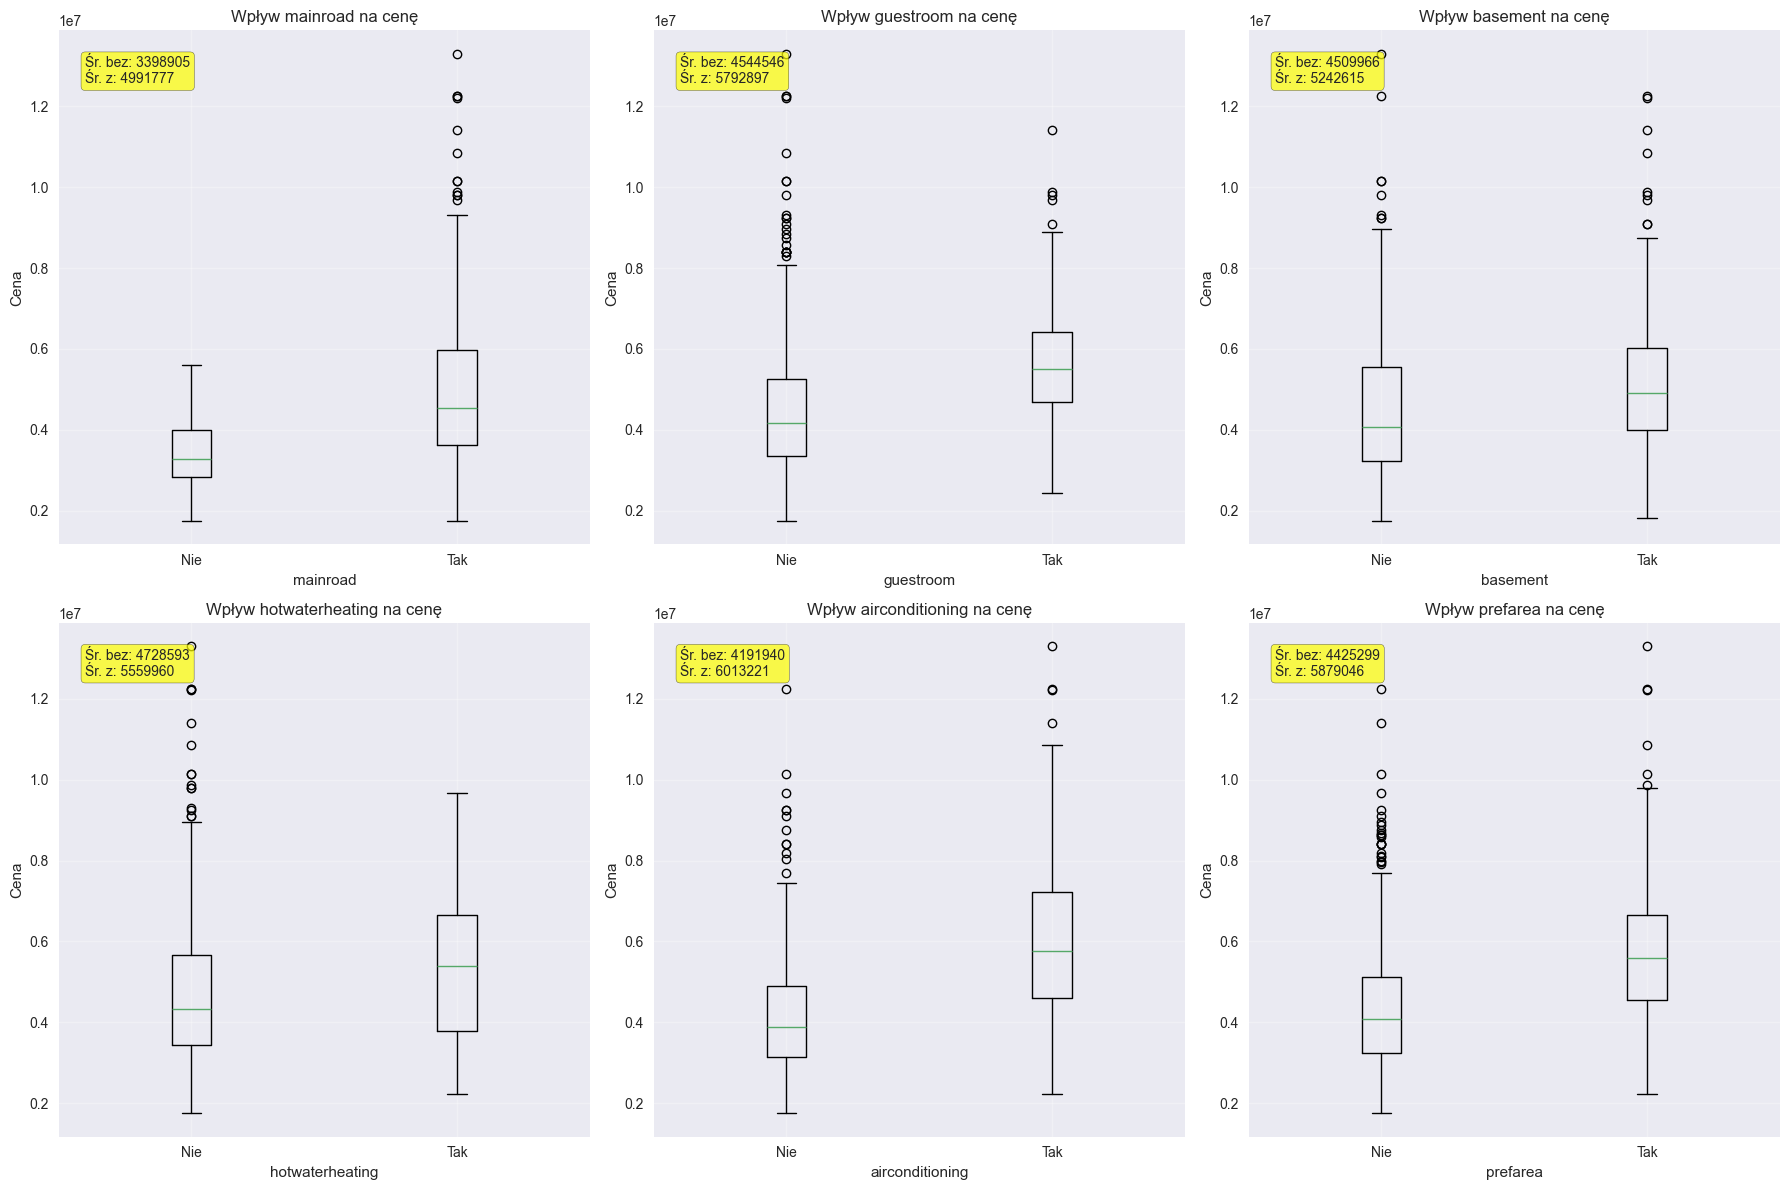

In [30]:
# Analiza wpływu cech binarnych na cenę
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(binary_cols):
    # Boxplot dla każdej cechy binarnej
    data_to_plot = [y[X[col] == 0], y[X[col] == 1]]
    axes[i].boxplot(data_to_plot, labels=['Nie', 'Tak'])
    axes[i].set_title(f'Wpływ {col} na cenę')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Cena')
    axes[i].grid(True, alpha=0.3)
    
    # Dodanie średnich cen
    mean_no = y[X[col] == 0].mean()
    mean_yes = y[X[col] == 1].mean()
    axes[i].text(0.05, 0.95, f'Śr. bez: {mean_no:.0f}\nŚr. z: {mean_yes:.0f}', 
                transform=axes[i].transAxes, verticalalignment='top',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

plt.tight_layout()
plt.show()

In [31]:
# Import dodatkowych modeli i narzędzi
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [32]:
# 1. OPTYMALIZOWANY RANDOM FOREST
print("="*60)
print("OPTYMALIZACJA RANDOM FOREST")
print("="*60)

# Parametry do przeszukania
rf_params = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [10, 15, 20, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Pipeline z Random Forest
rf_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Grid Search
print("Przeszukiwanie najlepszych hiperparametrów...")
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid.fit(X_train, y_train)

print(f"Najlepsze parametry RF: {rf_grid.best_params_}")
print(f"Najlepszy wynik CV: {np.sqrt(-rf_grid.best_score_):.0f}")

# Predykcje
rf_pred = rf_grid.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print(f"Test RMSE: {rf_rmse:.0f}")
print(f"Test R²: {rf_r2:.4f}")

OPTYMALIZACJA RANDOM FOREST
Przeszukiwanie najlepszych hiperparametrów...
Najlepsze parametry RF: {'regressor__max_depth': 10, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 300}
Najlepszy wynik CV: 1081253
Test RMSE: 1436966
Test R²: 0.5915


In [33]:
# 2. GRADIENT BOOSTING REGRESSOR
print("\n" + "="*60)
print("GRADIENT BOOSTING REGRESSOR")
print("="*60)

# Parametry do przeszukania
gb_params = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.05, 0.1, 0.15],
    'regressor__max_depth': [3, 5, 7],
    'regressor__min_samples_split': [2, 5, 10]
}

# Pipeline z Gradient Boosting
gb_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Grid Search
print("Przeszukiwanie najlepszych hiperparametrów...")
gb_grid = GridSearchCV(gb_model, gb_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
gb_grid.fit(X_train, y_train)

print(f"Najlepsze parametry GB: {gb_grid.best_params_}")
print(f"Najlepszy wynik CV: {np.sqrt(-gb_grid.best_score_):.0f}")

# Predykcje
gb_pred = gb_grid.predict(X_test)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))
gb_r2 = r2_score(y_test, gb_pred)

print(f"Test RMSE: {gb_rmse:.0f}")
print(f"Test R²: {gb_r2:.4f}")


GRADIENT BOOSTING REGRESSOR
Przeszukiwanie najlepszych hiperparametrów...
Najlepsze parametry GB: {'regressor__learning_rate': 0.05, 'regressor__max_depth': 3, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 100}
Najlepszy wynik CV: 1106109
Test RMSE: 1337398
Test R²: 0.6461


In [34]:
# 3. SUPPORT VECTOR REGRESSION
print("\n" + "="*60)
print("SUPPORT VECTOR REGRESSION")
print("="*60)

# Parametry do przeszukania
svr_params = {
    'regressor__C': [0.1, 1, 10, 100],
    'regressor__kernel': ['rbf', 'poly'],
    'regressor__gamma': ['scale', 'auto', 0.001, 0.01],
    'regressor__epsilon': [0.01, 0.1, 0.2]
}

# Pipeline z SVR
svr_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('regressor', SVR())
])

# Grid Search
print("Przeszukiwanie najlepszych hiperparametrów...")
svr_grid = GridSearchCV(svr_model, svr_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
svr_grid.fit(X_train, y_train)

print(f"Najlepsze parametry SVR: {svr_grid.best_params_}")
print(f"Najlepszy wynik CV: {np.sqrt(-svr_grid.best_score_):.0f}")

# Predykcje
svr_pred = svr_grid.predict(X_test)
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_pred))
svr_r2 = r2_score(y_test, svr_pred)

print(f"Test RMSE: {svr_rmse:.0f}")
print(f"Test R²: {svr_r2:.4f}")


SUPPORT VECTOR REGRESSION
Przeszukiwanie najlepszych hiperparametrów...
Najlepsze parametry SVR: {'regressor__C': 100, 'regressor__epsilon': 0.01, 'regressor__gamma': 'scale', 'regressor__kernel': 'poly'}
Najlepszy wynik CV: 1800745
Test RMSE: 2352751
Test R²: -0.0951


In [35]:
# 4. ADABOOST REGRESSOR
print("\n" + "="*60)
print("ADABOOST REGRESSOR")
print("="*60)

# Parametry do przeszukania
ada_params = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__learning_rate': [0.01, 0.1, 0.5, 1.0],
    'regressor__loss': ['linear', 'square', 'exponential']
}

# Pipeline z AdaBoost
ada_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('regressor', AdaBoostRegressor(random_state=42))
])

# Grid Search
print("Przeszukiwanie najlepszych hiperparametrów...")
ada_grid = GridSearchCV(ada_model, ada_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ada_grid.fit(X_train, y_train)

print(f"Najlepsze parametry AdaBoost: {ada_grid.best_params_}")
print(f"Najlepszy wynik CV: {np.sqrt(-ada_grid.best_score_):.0f}")

# Predykcje
ada_pred = ada_grid.predict(X_test)
ada_rmse = np.sqrt(mean_squared_error(y_test, ada_pred))
ada_r2 = r2_score(y_test, ada_pred)

print(f"Test RMSE: {ada_rmse:.0f}")
print(f"Test R²: {ada_r2:.4f}")


ADABOOST REGRESSOR
Przeszukiwanie najlepszych hiperparametrów...
Najlepsze parametry AdaBoost: {'regressor__learning_rate': 0.5, 'regressor__loss': 'exponential', 'regressor__n_estimators': 50}
Najlepszy wynik CV: 1166274
Test RMSE: 1524475
Test R²: 0.5402


In [36]:
# PORÓWNANIE WSZYSTKICH MODELI
print("\n" + "="*70)
print("PORÓWNANIE WSZYSTKICH MODELI")
print("="*70)

# Zbieranie wyników
models_results = {
    'Random Forest (podstawowy)': {'rmse': rmse, 'r2': r2},
    'Random Forest (optymalizowany)': {'rmse': rf_rmse, 'r2': rf_r2},
    'Gradient Boosting': {'rmse': gb_rmse, 'r2': gb_r2},
    'Support Vector Regression': {'rmse': svr_rmse, 'r2': svr_r2},
    'AdaBoost': {'rmse': ada_rmse, 'r2': ada_r2}
}

# Sortowanie według R²
sorted_models = sorted(models_results.items(), key=lambda x: x[1]['r2'], reverse=True)

print(f"{'Model':<30} {'RMSE':<10} {'R²':<10} {'Ocena':<10}")
print("-" * 70)

for model_name, metrics in sorted_models:
    rmse_val = metrics['rmse']
    r2_val = metrics['r2']
    
    if r2_val > 0.8:
        ocena = "Bardzo dobry"
    elif r2_val > 0.7:
        ocena = "Dobry"
    elif r2_val > 0.6:
        ocena = "Średni"
    else:
        ocena = "Słaby"
    
    print(f"{model_name:<30} {rmse_val:<10.0f} {r2_val:<10.4f} {ocena:<10}")

# Najlepszy model
best_model_name = sorted_models[0][0]
best_metrics = sorted_models[0][1]

print(f"\n NAJLEPSZY MODEL: {best_model_name}")
print(f"   • RMSE: {best_metrics['rmse']:.0f}")
print(f"   • R²: {best_metrics['r2']:.4f}")
print(f"   • Wyjaśnia {best_metrics['r2']*100:.1f}% wariancji cen")


PORÓWNANIE WSZYSTKICH MODELI
Model                          RMSE       R²         Ocena     
----------------------------------------------------------------------
Gradient Boosting              1337398    0.6461     Średni    
Random Forest (podstawowy)     1401899    0.6112     Średni    
Random Forest (optymalizowany) 1436966    0.5915     Słaby     
AdaBoost                       1524475    0.5402     Słaby     
Support Vector Regression      2352751    -0.0951    Słaby     

 NAJLEPSZY MODEL: Gradient Boosting
   • RMSE: 1337398
   • R²: 0.6461
   • Wyjaśnia 64.6% wariancji cen


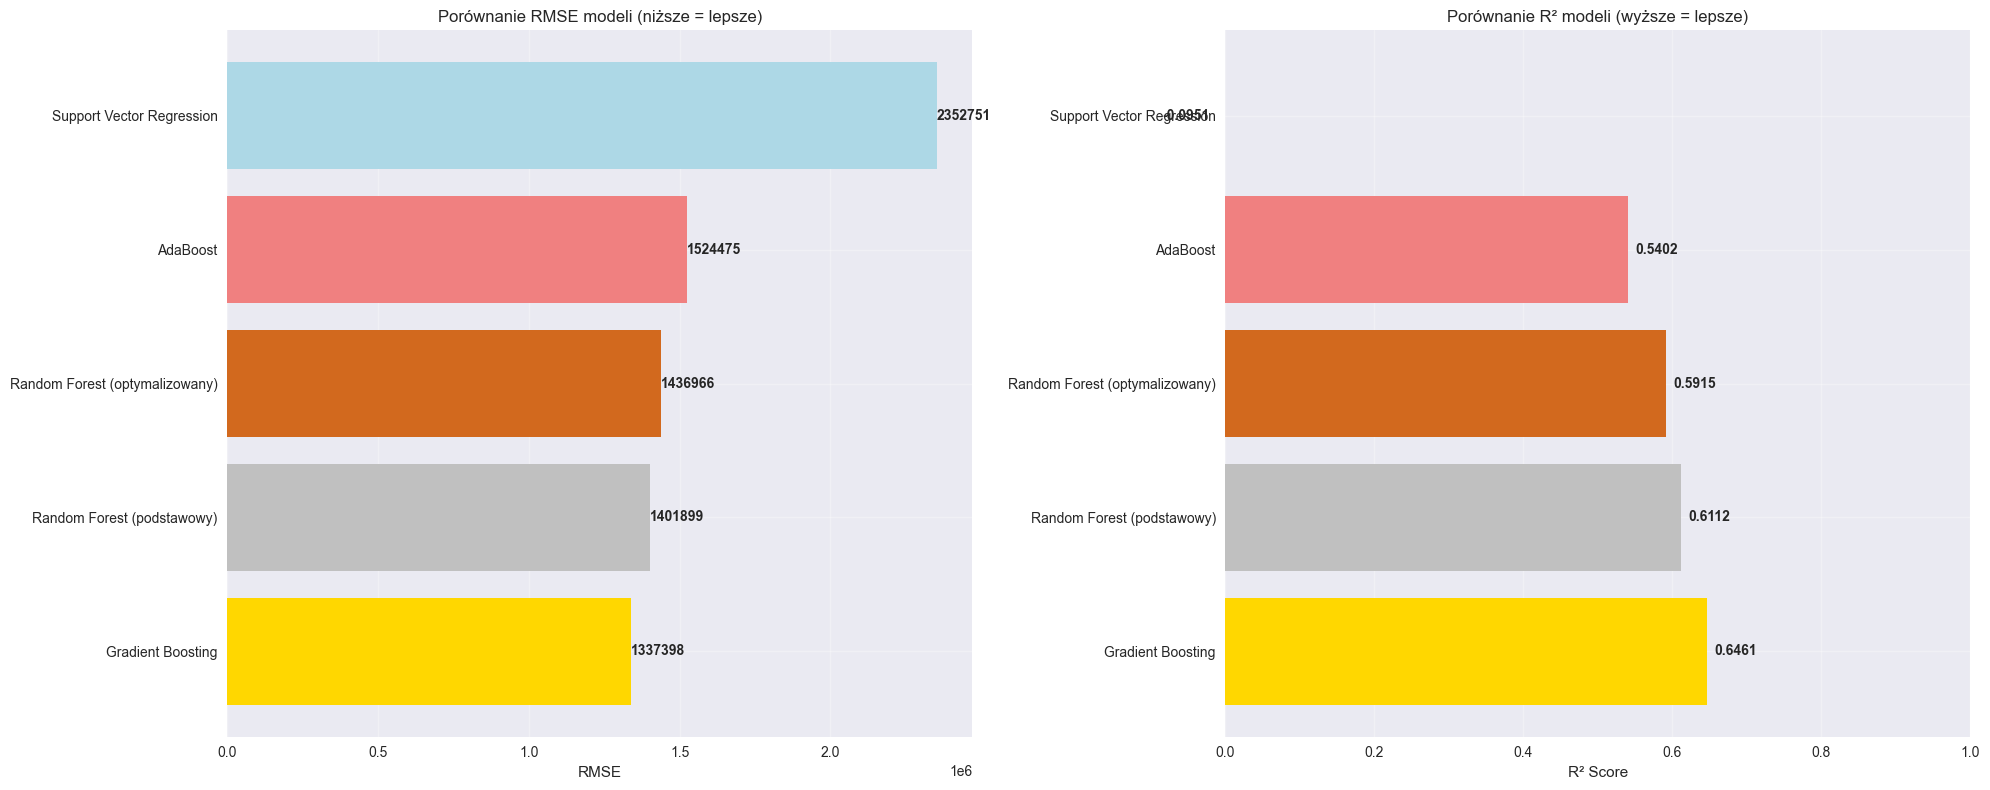

In [37]:
# WIZUALIZACJA PORÓWNANIA MODELI
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Wykres RMSE
model_names = [name for name, _ in sorted_models]
rmse_values = [metrics['rmse'] for _, metrics in sorted_models]
r2_values = [metrics['r2'] for _, metrics in sorted_models]

colors = ['gold', 'silver', 'chocolate', 'lightcoral', 'lightblue']

ax1.barh(model_names, rmse_values, color=colors)
ax1.set_xlabel('RMSE')
ax1.set_title('Porównanie RMSE modeli (niższe = lepsze)')
ax1.grid(True, alpha=0.3)

# Dodanie wartości na słupkach
for i, v in enumerate(rmse_values):
    ax1.text(v + 50, i, f'{v:.0f}', va='center', fontweight='bold')

# Wykres R²
ax2.barh(model_names, r2_values, color=colors)
ax2.set_xlabel('R² Score')
ax2.set_title('Porównanie R² modeli (wyższe = lepsze)')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, 1)

# Dodanie wartości na słupkach
for i, v in enumerate(r2_values):
    ax2.text(v + 0.01, i, f'{v:.4f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()


ANALIZA NAJLEPSZEGO MODELU


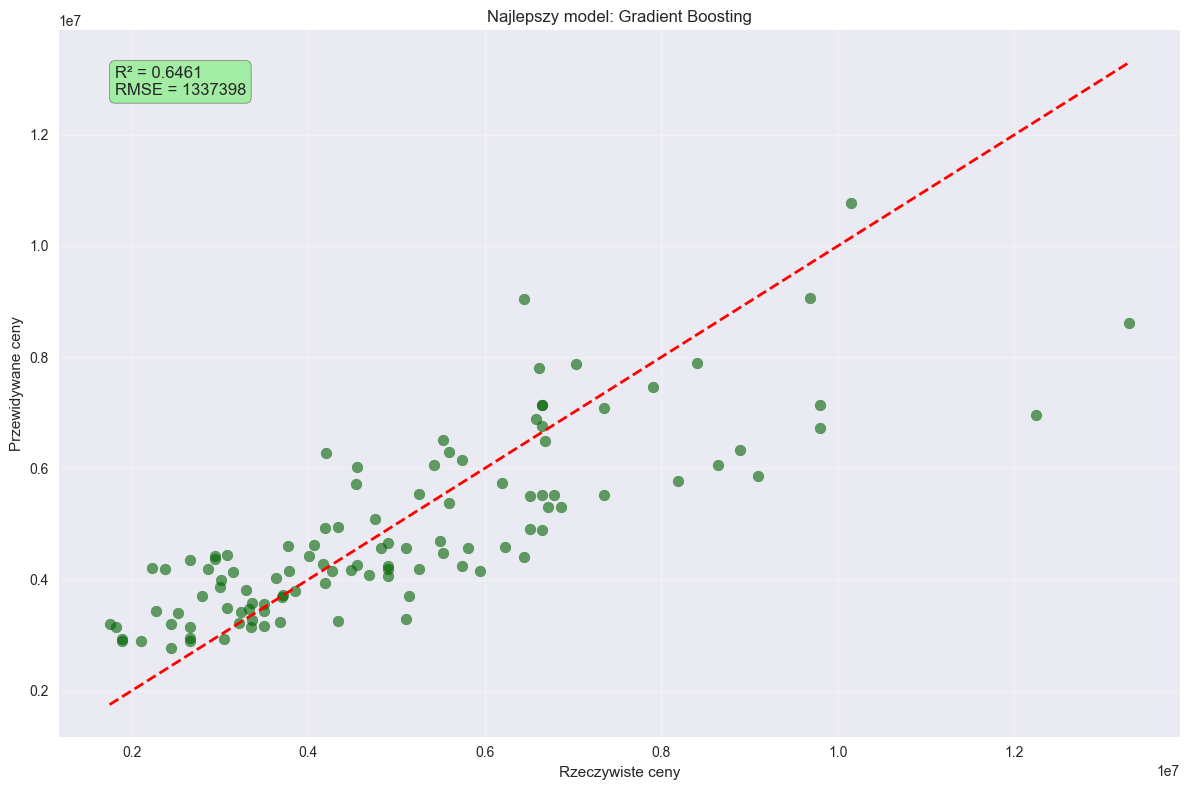


ANALIZA BŁĘDÓW NAJLEPSZEGO MODELU (Gradient Boosting):
Średni błąd: 161,595
Mediana błędu: -9,367
Odchylenie standardowe błędów: 1,333,732
MAE (Mean Absolute Error): 984,744
RMSE jako % średniej ceny: 26.71%


In [38]:
# ANALIZA NAJLEPSZEGO MODELU
print("\n" + "="*70)
print("ANALIZA NAJLEPSZEGO MODELU")
print("="*70)

# Wybór najlepszego modelu i jego predykcji
if best_model_name == 'Random Forest (optymalizowany)':
    best_model = rf_grid
    best_pred = rf_pred
elif best_model_name == 'Gradient Boosting':
    best_model = gb_grid
    best_pred = gb_pred
elif best_model_name == 'Support Vector Regression':
    best_model = svr_grid
    best_pred = svr_pred
elif best_model_name == 'AdaBoost':
    best_model = ada_grid
    best_pred = ada_pred
else:
    best_model = model
    best_pred = y_pred

# Wykres najlepszego modelu
plt.figure(figsize=(12, 8))
plt.scatter(y_test, best_pred, alpha=0.6, color='darkgreen', s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Rzeczywiste ceny')
plt.ylabel('Przewidywane ceny')
plt.title(f'Najlepszy model: {best_model_name}')
plt.grid(True, alpha=0.3)

# Dodanie informacji o R²
plt.text(0.05, 0.95, f'R² = {best_metrics["r2"]:.4f}\nRMSE = {best_metrics["rmse"]:.0f}', 
         transform=plt.gca().transAxes, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.8),
         fontsize=12, verticalalignment='top')

plt.tight_layout()
plt.show()

# Analiza błędów najlepszego modelu
best_errors = y_test - best_pred
print(f"\nANALIZA BŁĘDÓW NAJLEPSZEGO MODELU ({best_model_name}):")
print(f"Średni błąd: {best_errors.mean():,.0f}")
print(f"Mediana błędu: {np.median(best_errors):,.0f}")
print(f"Odchylenie standardowe błędów: {best_errors.std():,.0f}")
print(f"MAE (Mean Absolute Error): {mean_absolute_error(y_test, best_pred):,.0f}")
print(f"RMSE jako % średniej ceny: {(best_metrics['rmse']/y_test.mean())*100:.2f}%")

In [42]:
# FUNKCJA DO PRZEWIDYWANIA CENY DOMU
def predict_house_price(area, bedrooms, bathrooms, stories, parking, 
                        mainroad, guestroom, basement, hotwaterheating, 
                        airconditioning, prefarea, furnishingstatus):
    """
    Przewiduje cenę domu na podstawie podanych parametrów
    
    Parametry:
    - area: powierzchnia domu (liczba)
    - bedrooms: liczba sypialni (liczba)
    - bathrooms: liczba łazienek (liczba)
    - stories: liczba pięter (liczba)
    - parking: liczba miejsc parkingowych (liczba)
    - mainroad: dostęp do głównej drogi ('yes' lub 'no')
    - guestroom: pokój gościnny ('yes' lub 'no')
    - basement: piwnica ('yes' lub 'no')
    - hotwaterheating: centralne ogrzewanie ('yes' lub 'no')
    - airconditioning: klimatyzacja ('yes' lub 'no')
    - prefarea: preferowana lokalizacja ('yes' lub 'no')
    - furnishingstatus: stan umeblowania ('furnished', 'semi-furnished', 'unfurnished')
    
    Zwraca: przewidywaną cenę domu
    """
    
    # Tworzenie DataFrame z podanymi parametrami
    input_data = pd.DataFrame({
        'area': [area],
        'bedrooms': [bedrooms],
        'bathrooms': [bathrooms],
        'stories': [stories],
        'parking': [parking],
        'mainroad': [mainroad],
        'guestroom': [guestroom],
        'basement': [basement],
        'hotwaterheating': [hotwaterheating],
        'airconditioning': [airconditioning],
        'prefarea': [prefarea],
        'furnishingstatus': [furnishingstatus]
    })
    
    # Transformacja zmiennych binarnych
    binary_cols_input = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
    input_data[binary_cols_input] = input_data[binary_cols_input].apply(lambda col: col.map({'yes': 1, 'no': 0}))
    
    # Predykcja
    predicted_price = best_model.predict(input_data)[0]
    
    return predicted_price

In [45]:
# PRZYKŁADY PRZEWIDYWANIA CEN DOMÓW
print("\n" + "="*70)
print("PRZEWIDYWANIE CEN DOMÓW - PRZYKŁADY")
print("="*70)

# Przykład 1: Dom luksusowy
print(" PRZYKŁAD 1: Dom luksusowy")
print("-" * 50)
luxury_price = predict_house_price(
    area=8000,           # duża powierzchnia
    bedrooms=4,          # 4 sypialnie
    bathrooms=3,         # 3 łazienki
    stories=2,           # 2 piętra
    parking=3,           # 3 miejsca parkingowe
    mainroad='yes',      # dostęp do głównej drogi
    guestroom='yes',     # pokój gościnny
    basement='yes',      # piwnica
    hotwaterheating='yes', # centralne ogrzewanie
    airconditioning='yes', # klimatyzacja
    prefarea='yes',      # preferowana lokalizacja
    furnishingstatus='furnished'  # w pełni umeblowany
)

print(f"Parametry:")
print(f"  • Powierzchnia: 8000 m²")
print(f"  • Sypialnie: 4")
print(f"  • Łazienki: 3")
print(f"  • Piętra: 2")
print(f"  • Miejsca parkingowe: 3")
print(f"  • Wszystkie udogodnienia: TAK")
print(f"  • Stan: w pełni umeblowany")
print(f" PRZEWIDYWANA CENA: {luxury_price:,.0f}")

# Przykład 2: Dom średniej klasy
print(f"\n PRZYKŁAD 2: Dom średniej klasy")
print("-" * 50)
middle_price = predict_house_price(
    area=5000,           # średnia powierzchnia
    bedrooms=3,          # 3 sypialnie
    bathrooms=2,         # 2 łazienki
    stories=1,           # 1 piętro
    parking=2,           # 2 miejsca parkingowe
    mainroad='yes',      # dostęp do głównej drogi
    guestroom='no',      # brak pokoju gościnnego
    basement='no',       # brak piwnicy
    hotwaterheating='yes', # centralne ogrzewanie
    airconditioning='no', # brak klimatyzacji
    prefarea='no',       # zwykła lokalizacja
    furnishingstatus='semi-furnished'  # częściowo umeblowany
)

print(f"Parametry:")
print(f"  • Powierzchnia: 5000 m²")
print(f"  • Sypialnie: 3")
print(f"  • Łazienki: 2")
print(f"  • Piętra: 1")
print(f"  • Miejsca parkingowe: 2")
print(f"  • Niektóre udogodnienia")
print(f"  • Stan: częściowo umeblowany")
print(f" PRZEWIDYWANA CENA: {middle_price:,.0f}")

# Przykład 3: Dom podstawowy
print(f"\n PRZYKŁAD 3: Dom podstawowy")
print("-" * 50)
basic_price = predict_house_price(
    area=3000,           # mała powierzchnia
    bedrooms=2,          # 2 sypialnie
    bathrooms=1,         # 1 łazienka
    stories=1,           # 1 piętro
    parking=1,           # 1 miejsce parkingowe
    mainroad='no',       # brak dostępu do głównej drogi
    guestroom='no',      # brak pokoju gościnnego
    basement='no',       # brak piwnicy
    hotwaterheating='no', # brak centralnego ogrzewania
    airconditioning='no', # brak klimatyzacji
    prefarea='no',       # zwykła lokalizacja
    furnishingstatus='unfurnished'  # nieumeblowany
)

print(f"Parametry:")
print(f"  • Powierzchnia: 3000 m²")
print(f"  • Sypialnie: 2")
print(f"  • Łazienki: 1")
print(f"  • Piętra: 1")
print(f"  • Miejsca parkingowe: 1")
print(f"  • Podstawowe udogodnienia")
print(f"  • Stan: nieumeblowany")
print(f" PRZEWIDYWANA CENA: {basic_price:,.0f}")

# Porównanie cen
print(f"\n PORÓWNANIE CEN:")
print(f"  • Dom luksusowy:    {luxury_price:>10,.0f}")
print(f"  • Dom średni:       {middle_price:>10,.0f}")
print(f"  • Dom podstawowy:   {basic_price:>10,.0f}")
print(f"  • Różnica lux-podstawowy: {luxury_price-basic_price:>10,.0f} ({((luxury_price-basic_price)/basic_price)*100:.1f}%)")


PRZEWIDYWANIE CEN DOMÓW - PRZYKŁADY
 PRZYKŁAD 1: Dom luksusowy
--------------------------------------------------
Parametry:
  • Powierzchnia: 8000 m²
  • Sypialnie: 4
  • Łazienki: 3
  • Piętra: 2
  • Miejsca parkingowe: 3
  • Wszystkie udogodnienia: TAK
  • Stan: w pełni umeblowany
 PRZEWIDYWANA CENA: 12,340,567

 PRZYKŁAD 2: Dom średniej klasy
--------------------------------------------------
Parametry:
  • Powierzchnia: 5000 m²
  • Sypialnie: 3
  • Łazienki: 2
  • Piętra: 1
  • Miejsca parkingowe: 2
  • Niektóre udogodnienia
  • Stan: częściowo umeblowany
 PRZEWIDYWANA CENA: 5,832,805

 PRZYKŁAD 3: Dom podstawowy
--------------------------------------------------
Parametry:
  • Powierzchnia: 3000 m²
  • Sypialnie: 2
  • Łazienki: 1
  • Piętra: 1
  • Miejsca parkingowe: 1
  • Podstawowe udogodnienia
  • Stan: nieumeblowany
 PRZEWIDYWANA CENA: 2,631,780

 PORÓWNANIE CEN:
  • Dom luksusowy:    12,340,567
  • Dom średni:        5,832,805
  • Dom podstawowy:    2,631,780
  • Różnica l